In [53]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
from get_processed_data import get_processed_data
import seaborn as sns
from scikeras.wrappers import KerasClassifier
from tensorflow import keras
from sampling import undersample, oversample, smote, ncr
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, roc_curve, auc, confusion_matrix,
    roc_auc_score, precision_recall_curve
)

### Splitting data

In [54]:
df4, X_train, y_train, X_val, y_val, X_test, y_test = get_processed_data()
# X_train.to_csv(r"C:\Users\760421\Downloads\P_FAILING_HEAD.csv", index=False)


Training set shape: (12335, 55) (12335,)
Validation set shape: (1542, 55) (1542,)
Test set shape: (1542, 55) (1542,)


In [55]:
input_size = X_train.shape[1]  # Number of features in the input layer
output_size = 1  # For binary classification

# Choose the number of neurons for the hidden layer
hidden_layer_neurons = int((input_size + output_size) / 2)
hidden_layer_neurons


28

In [56]:
# def ann():
#     model = keras.Sequential([
#     layers.Dense(28, activation='relu', input_shape=(55,)),
#     # layers.Dense(10, activation='relu'),
#     layers.Dense(1, activation='sigmoid')
#     ])
   
#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#     return model

def ann(optimizer='adam', activation='relu', dropout_rate=0.0, hidden_units=16, learning_rate=0.01):
    model = keras.Sequential()
    model.add(layers.Dense(hidden_units, activation=activation, input_shape=(55,)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

def train_ann(X_train, y_train, X_test, y_test, sampling_technique,class_weights=None,param_grid=None):

    # model = KerasClassifier(build_fn=ann, epochs=10)
    model = KerasClassifier(build_fn=ann, optimizer='adam', activation='relu', dropout_rate=0.0, 
                            hidden_units=16, learning_rate=0.01, batch_size=32, epochs=30)
    # model = KerasClassifier(build_fn=ann, optimizer='adam', activation='relu', dropout_rate=0.1, 
    #                         hidden_units=32, learning_rate=0.1, batch_size=32, epochs=40)

    model.fit(X_train, y_train, class_weight=class_weights)
    # model.fit(X_train, y_train, epochs=30, batch_size=32,class_weight=class_weights)
    
    y_pred = model.predict(X_test)
    y_pred_classes = [1 if i>0.5 else 0 for i in y_pred]

   
    print("Classification Report:")
    print(classification_report(y_test, y_pred_classes))
    
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    Recall = round(recall_score(y_test, y_pred)*100,2)
    Precision = round(precision_score(y_test, y_pred)*100,2)
    f1 = round(f1_score(y_test, y_pred)*100,2)
    accuracy = round(accuracy_score(y_test, y_pred)*100,2)
    
    metrics = [sampling_technique, Recall, Precision, f1,accuracy]
    # Generate ROC curve and calculate AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_classes)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({sampling_technique})')
    plt.legend(loc='lower right')
    plt.show()
        
    return metrics

Epoch 1/30


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


386/386 [==============================] - 1s 1ms/step - loss: 25.4988 - accuracy: 0.6764
Epoch 2/30
386/386 [==============================] - 0s 1ms/step - loss: 0.2252 - accuracy: 0.9414
Epoch 3/30
386/386 [==============================] - 0s 1ms/step - loss: 0.2245 - accuracy: 0.9413
Epoch 4/30
386/386 [==============================] - 0s 1ms/step - loss: 0.2244 - accuracy: 0.9413
Epoch 5/30
386/386 [==============================] - 0s 1ms/step - loss: 0.2234 - accuracy: 0.9413
Epoch 6/30
386/386 [==============================] - 0s 1ms/step - loss: 0.2233 - accuracy: 0.9413
Epoch 7/30
386/386 [==============================] - 0s 1ms/step - loss: 0.2231 - accuracy: 0.9413
Epoch 8/30
386/386 [==============================] - 0s 999us/step - loss: 0.2191 - accuracy: 0.9412
Epoch 9/30
386/386 [==============================] - 0s 1ms/step - loss: 0.2215 - accuracy: 0.9413
Epoch 10/30
386/386 [==============================] - 0s 985us/step - loss: 0.2199 - accuracy: 0.9411
Epoch

C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

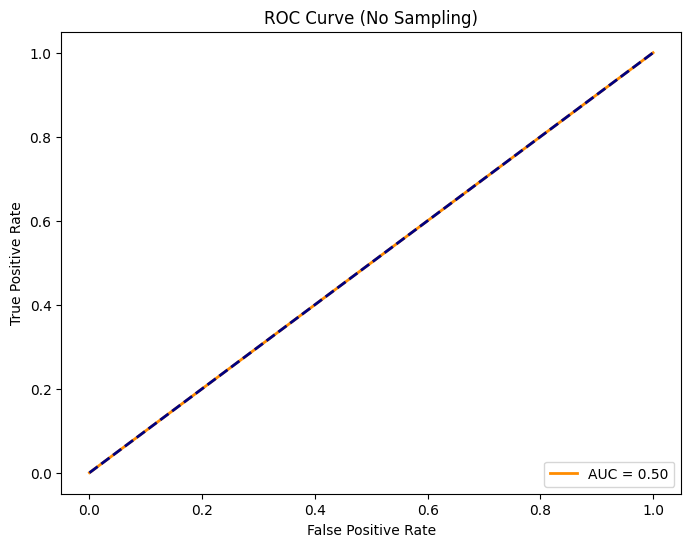

Epoch 1/30


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


726/726 [==============================] - 1s 1ms/step - loss: 0.3454 - accuracy: 0.8516
Epoch 2/30
726/726 [==============================] - 1s 1ms/step - loss: 0.1719 - accuracy: 0.9346
Epoch 3/30
726/726 [==============================] - 1s 998us/step - loss: 0.1504 - accuracy: 0.9425
Epoch 4/30
726/726 [==============================] - 1s 1ms/step - loss: 0.1414 - accuracy: 0.9458
Epoch 5/30
726/726 [==============================] - 1s 1ms/step - loss: 0.1357 - accuracy: 0.9484
Epoch 6/30
726/726 [==============================] - 1s 998us/step - loss: 0.1322 - accuracy: 0.9494
Epoch 7/30
726/726 [==============================] - 1s 1ms/step - loss: 0.1280 - accuracy: 0.9502
Epoch 8/30
726/726 [==============================] - 1s 1ms/step - loss: 0.1261 - accuracy: 0.9525
Epoch 9/30
726/726 [==============================] - 1s 1ms/step - loss: 0.1243 - accuracy: 0.9514
Epoch 10/30
726/726 [==============================] - 1s 1ms/step - loss: 0.1224 - accuracy: 0.9527
Epoch 

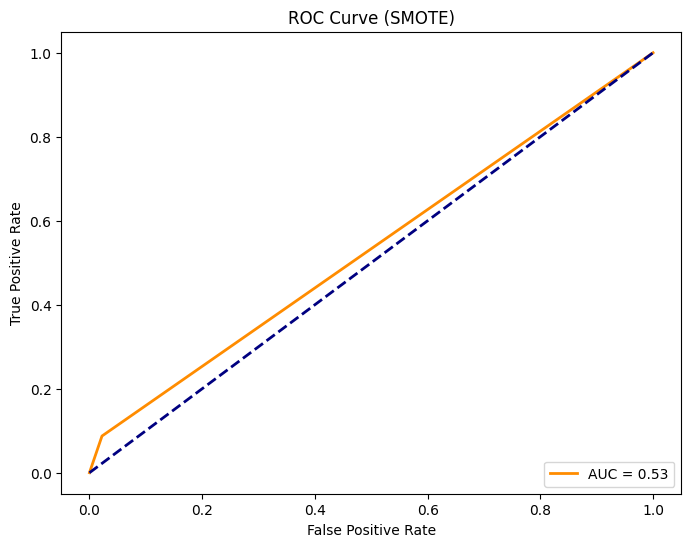

Epoch 1/30


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


726/726 [==============================] - 1s 1ms/step - loss: 0.5545 - accuracy: 0.7154
Epoch 2/30
726/726 [==============================] - 1s 996us/step - loss: 0.4663 - accuracy: 0.7800
Epoch 3/30
726/726 [==============================] - 1s 976us/step - loss: 0.4376 - accuracy: 0.7949
Epoch 4/30
726/726 [==============================] - 1s 975us/step - loss: 0.4181 - accuracy: 0.8063
Epoch 5/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4051 - accuracy: 0.8135
Epoch 6/30
726/726 [==============================] - 1s 983us/step - loss: 0.3956 - accuracy: 0.8188
Epoch 7/30
726/726 [==============================] - 1s 1ms/step - loss: 0.3877 - accuracy: 0.8259
Epoch 8/30
726/726 [==============================] - 1s 1ms/step - loss: 0.3819 - accuracy: 0.8312
Epoch 9/30
726/726 [==============================] - 1s 1ms/step - loss: 0.3769 - accuracy: 0.8355
Epoch 10/30
726/726 [==============================] - 1s 1ms/step - loss: 0.3724 - accuracy: 0.8394
Ep

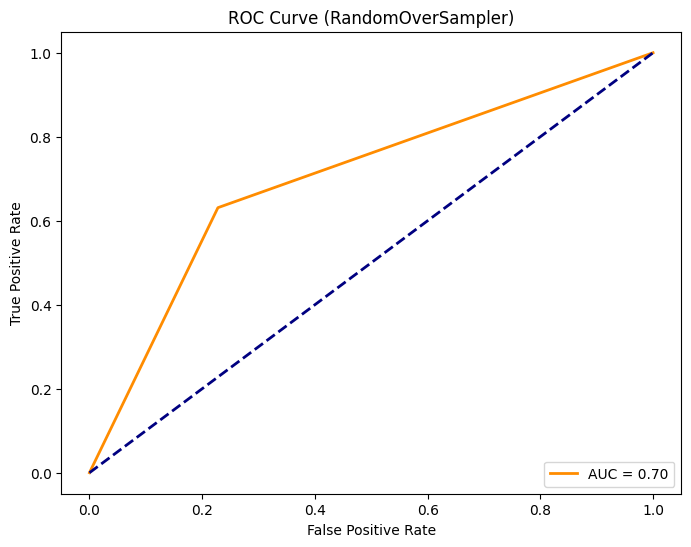

Epoch 1/30


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


46/46 [==============================] - 1s 1ms/step - loss: 0.8090 - accuracy: 0.4800
Epoch 2/30
46/46 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5739
Epoch 3/30
46/46 [==============================] - 0s 1ms/step - loss: 0.6269 - accuracy: 0.6526
Epoch 4/30
46/46 [==============================] - 0s 988us/step - loss: 0.5864 - accuracy: 0.6885
Epoch 5/30
46/46 [==============================] - 0s 1ms/step - loss: 0.5579 - accuracy: 0.7189
Epoch 6/30
46/46 [==============================] - 0s 1ms/step - loss: 0.5370 - accuracy: 0.7396
Epoch 7/30
46/46 [==============================] - 0s 1ms/step - loss: 0.5194 - accuracy: 0.7590
Epoch 8/30
46/46 [==============================] - 0s 988us/step - loss: 0.5047 - accuracy: 0.7652
Epoch 9/30
46/46 [==============================] - 0s 980us/step - loss: 0.4917 - accuracy: 0.7728
Epoch 10/30
46/46 [==============================] - 0s 965us/step - loss: 0.4800 - accuracy: 0.7797
Epoch 11/30
46/46 [===

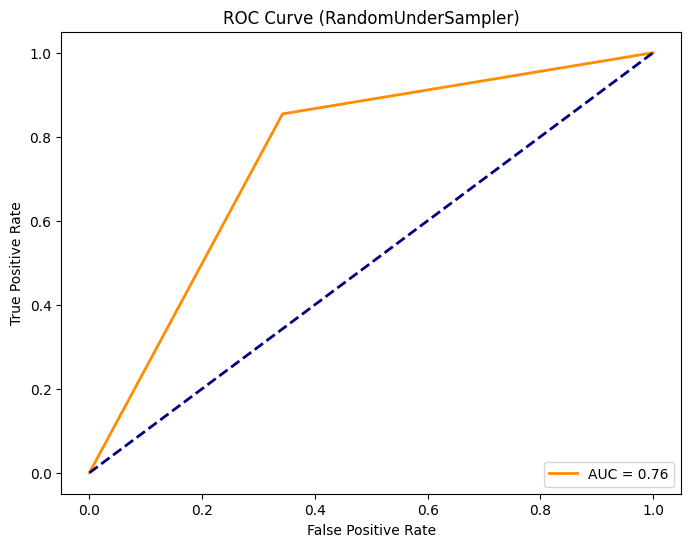

Epoch 1/30


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


330/330 [==============================] - 1s 1ms/step - loss: 0.3016 - accuracy: 0.9110
Epoch 2/30
330/330 [==============================] - 0s 976us/step - loss: 0.2227 - accuracy: 0.9311
Epoch 3/30
330/330 [==============================] - 0s 985us/step - loss: 0.2113 - accuracy: 0.9312
Epoch 4/30
330/330 [==============================] - 0s 979us/step - loss: 0.2051 - accuracy: 0.9314
Epoch 5/30
330/330 [==============================] - 0s 977us/step - loss: 0.2000 - accuracy: 0.9313
Epoch 6/30
330/330 [==============================] - 0s 985us/step - loss: 0.1960 - accuracy: 0.9320
Epoch 7/30
330/330 [==============================] - 0s 977us/step - loss: 0.1924 - accuracy: 0.9322
Epoch 8/30
330/330 [==============================] - 0s 988us/step - loss: 0.1899 - accuracy: 0.9323
Epoch 9/30
330/330 [==============================] - 0s 962us/step - loss: 0.1873 - accuracy: 0.9330
Epoch 10/30
330/330 [==============================] - 0s 962us/step - loss: 0.1854 - accuracy:

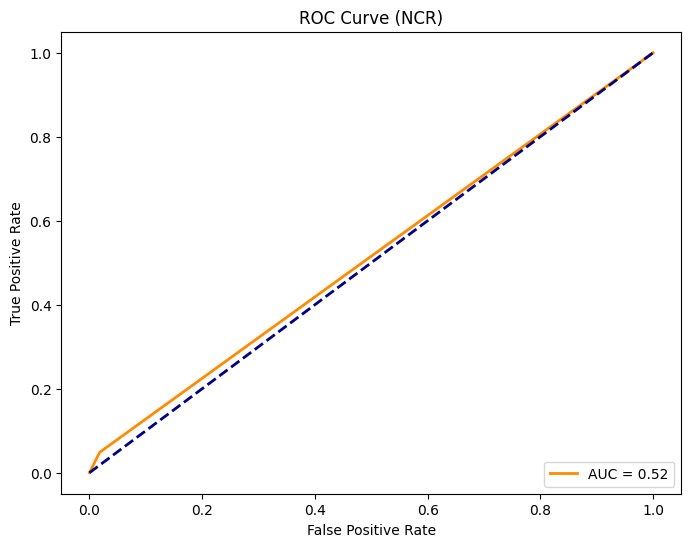

In [57]:
results = {}
scaler = StandardScaler()
#No Sampling
metrics = train_ann(X_train,y_train,X_test,y_test,'No Sampling')
results[metrics[0]] = metrics[1:]

# smote = SMOTE(random_state=42)
# X_smote, y_smote = smote.fit_resample(X_train, y_train)
X_smote, y_smote = smote(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_smote)
X_test_scaled = scaler.transform(X_test)
metrics = train_ann(X_train_scaled, y_smote, X_test_scaled, y_test,'SMOTE')
results[metrics[0]] = metrics[1:]

# ros = RandomOverSampler(random_state=42)
# X_over, y_over = ros.fit_resample(X_train, y_train)
X_over, y_over = oversample(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_over)
X_test_scaled = scaler.transform(X_test)
metrics = train_ann(X_train_scaled, y_over, X_test_scaled, y_test,'RandomOverSampler')
results[metrics[0]] = metrics[1:]


# rus = RandomUnderSampler(random_state=42)
# X_under, y_under = rus.fit_resample(X_train, y_train)
X_under, y_under = undersample(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_under)
X_test_scaled = scaler.transform(X_test)
metrics = train_ann(X_train_scaled, y_under, X_test_scaled, y_test,'RandomUnderSampler')
results[metrics[0]] = metrics[1:]

# X_ncr, y_ncr = ncr(X_train, y_train)
# metrics = train_ann(X_ncr, y_ncr, X_test, y_test,'NCR')
# results[metrics[0]] = metrics[1:]
X_ncr, y_ncr = ncr(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_ncr)
X_test_scaled = scaler.transform(X_test)
metrics = train_ann(X_train_scaled, y_ncr, X_test_scaled, y_test,'NCR')
results[metrics[0]] = metrics[1:]

In [58]:
sampling_techniques = list(results.keys())
metrics = ['Recall', 'Precision', 'F1 Score', 'Accuracy']
results_df = pd.DataFrame.from_dict(results, orient='index', columns=metrics)
sorted_df = results_df.sort_values(by=['F1 Score', 'Precision', 'Recall', 'Accuracy'], ascending=False)
sorted_df

,Recall,Precision,F1 Score,Accuracy
RandomOverSampler,63.11,16.54,26.21,76.26
RandomUnderSampler,85.44,15.15,25.73,67.06
SMOTE,8.74,21.95,12.50,91.83
NCR,4.85,16.13,7.46,91.96
No Sampling,0.00,0.00,0.00,93.32


```Hyper-Parameter Tuning```

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, recall_score


# Create a KerasClassifier for use in GridSearchCV
model = KerasClassifier(build_fn=ann, optimizer="adam", epochs=30, batch_size=32, verbose=0,activation = "relu", 
                        dropout_rate=0,hidden_units=16, learning_rate=0.01)

# Define the hyperparameters to tune
param_grid = {
    'optimizer': ['adam'],  # Optimizer choices
    'activation': ['relu', 'sigmoid'],  # Activation functions
    'hidden_units': [8, 16, 32],  # Number of neurons in the hidden layer(s)
    'learning_rate': [0.001,0.01, 0.1],  # Learning rate for the optimizer
    'batch_size': [32],  # Batch size for training
    'epochs': [30,40],  # Number of training epochs
    'dropout_rate': [0.0, 0.1,0.2],
}

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=make_scorer(recall_score), cv=3)
grid_result = grid.fit(X_over, y_over)

# Print the best parameters and accuracy
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Err

Best: 1.000000 using {'activation': 'sigmoid', 'batch_size': 32, 'dropout_rate': 0.0, 'epochs': 30, 'hidden_units': 8, 'learning_rate': 0.1, 'optimizer': 'adam'}


In [68]:

def train_ann(X_train, y_train, X_test, y_test, sampling_technique,class_weights=None,param_grid=None):

    # model = KerasClassifier(build_fn=ann, epochs=10)
    model = KerasClassifier(build_fn=ann, optimizer='adam', activation='sigmoid', 
                            dropout_rate=0.0, 
                            hidden_units=8, learning_rate=0.1, batch_size=32, epochs=30)
    # model = KerasClassifier(build_fn=ann, optimizer='adam', activation='relu', dropout_rate=0.1, 
    #                         hidden_units=32, learning_rate=0.1, batch_size=32, epochs=40)

    model.fit(X_train, y_train, class_weight=class_weights)
    # model.fit(X_train, y_train, epochs=30, batch_size=32,class_weight=class_weights)
    
    y_pred = model.predict(X_test)
    y_pred_classes = [1 if i>0.5 else 0 for i in y_pred]

   
    print("Classification Report:")
    print(classification_report(y_test, y_pred_classes))
    
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    Recall = round(recall_score(y_test, y_pred)*100,2)
    Precision = round(precision_score(y_test, y_pred)*100,2)
    f1 = round(f1_score(y_test, y_pred)*100,2)
    accuracy = round(accuracy_score(y_test, y_pred)*100,2)
    
    metrics = [sampling_technique, Recall, Precision, f1,accuracy]
    # Generate ROC curve and calculate AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_classes)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({sampling_technique})')
    plt.legend(loc='lower right')
    plt.show()
        
    return metrics

Epoch 1/30


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


386/386 [==============================] - 1s 1ms/step - loss: 0.4354 - accuracy: 0.8670
Epoch 2/30
386/386 [==============================] - 0s 1ms/step - loss: 0.2546 - accuracy: 0.9413
Epoch 3/30
386/386 [==============================] - 0s 1ms/step - loss: 0.2289 - accuracy: 0.9413
Epoch 4/30
386/386 [==============================] - 0s 1ms/step - loss: 0.2242 - accuracy: 0.9413
Epoch 5/30
386/386 [==============================] - 0s 1ms/step - loss: 0.2235 - accuracy: 0.9413
Epoch 6/30
386/386 [==============================] - 0s 1ms/step - loss: 0.2234 - accuracy: 0.9413
Epoch 7/30
386/386 [==============================] - 0s 1ms/step - loss: 0.2234 - accuracy: 0.9413
Epoch 8/30
386/386 [==============================] - 0s 1ms/step - loss: 0.2234 - accuracy: 0.9413
Epoch 9/30
386/386 [==============================] - 0s 1ms/step - loss: 0.2234 - accuracy: 0.9413
Epoch 10/30
386/386 [==============================] - 0s 1ms/step - loss: 0.2235 - accuracy: 0.9413
Epoch 11/3

C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

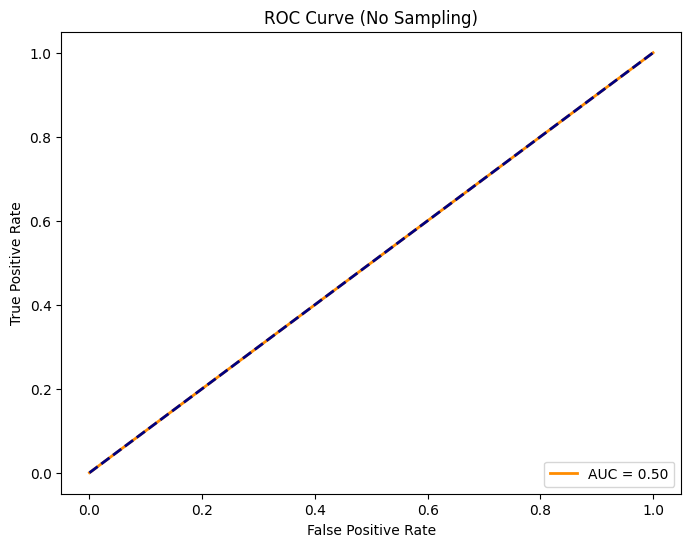

Epoch 1/30


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


726/726 [==============================] - 1s 1ms/step - loss: 0.4314 - accuracy: 0.8335
Epoch 2/30
726/726 [==============================] - 1s 1ms/step - loss: 0.2233 - accuracy: 0.9250
Epoch 3/30
726/726 [==============================] - 1s 1ms/step - loss: 0.1848 - accuracy: 0.9348
Epoch 4/30
726/726 [==============================] - 1s 1ms/step - loss: 0.1713 - accuracy: 0.9375
Epoch 5/30
726/726 [==============================] - 1s 1ms/step - loss: 0.1643 - accuracy: 0.9392
Epoch 6/30
726/726 [==============================] - 1s 1ms/step - loss: 0.1599 - accuracy: 0.9399
Epoch 7/30
726/726 [==============================] - 1s 1ms/step - loss: 0.1568 - accuracy: 0.9408
Epoch 8/30
726/726 [==============================] - 1s 1ms/step - loss: 0.1545 - accuracy: 0.9414
Epoch 9/30
726/726 [==============================] - 1s 1ms/step - loss: 0.1522 - accuracy: 0.9423
Epoch 10/30
726/726 [==============================] - 1s 1ms/step - loss: 0.1502 - accuracy: 0.9421
Epoch 11/3

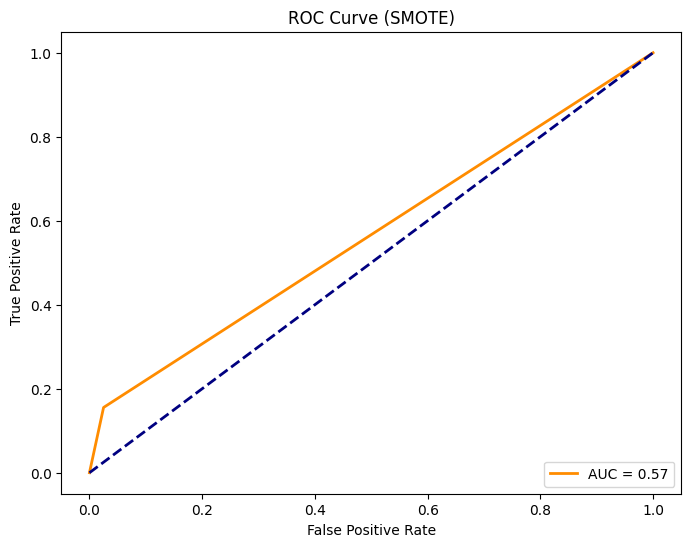

Epoch 1/30


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


726/726 [==============================] - 1s 1ms/step - loss: 0.5848 - accuracy: 0.7099
Epoch 2/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5203 - accuracy: 0.7467
Epoch 3/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5030 - accuracy: 0.7572
Epoch 4/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4914 - accuracy: 0.7645
Epoch 5/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4821 - accuracy: 0.7683
Epoch 6/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4745 - accuracy: 0.7747
Epoch 7/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4681 - accuracy: 0.7793
Epoch 8/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4628 - accuracy: 0.7847
Epoch 9/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4582 - accuracy: 0.7861
Epoch 10/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4534 - accuracy: 0.7896
Epoch 11/3

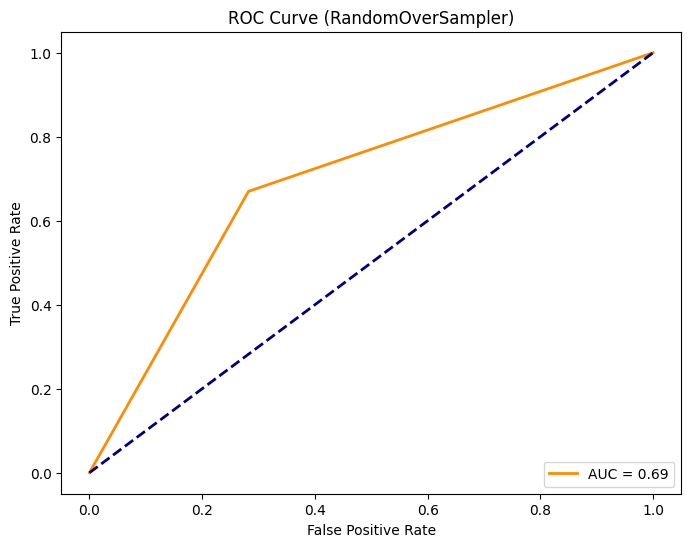

Epoch 1/30


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


46/46 [==============================] - 0s 1ms/step - loss: 0.8135 - accuracy: 0.5000
Epoch 2/30
46/46 [==============================] - 0s 1ms/step - loss: 0.7452 - accuracy: 0.5007
Epoch 3/30
46/46 [==============================] - 0s 1ms/step - loss: 0.6972 - accuracy: 0.5152
Epoch 4/30
46/46 [==============================] - 0s 1ms/step - loss: 0.6646 - accuracy: 0.5863
Epoch 5/30
46/46 [==============================] - 0s 1ms/step - loss: 0.6417 - accuracy: 0.6623
Epoch 6/30
46/46 [==============================] - 0s 1ms/step - loss: 0.6244 - accuracy: 0.6989
Epoch 7/30
46/46 [==============================] - 0s 1ms/step - loss: 0.6104 - accuracy: 0.7210
Epoch 8/30
46/46 [==============================] - 0s 1ms/step - loss: 0.5984 - accuracy: 0.7424
Epoch 9/30
46/46 [==============================] - 0s 1ms/step - loss: 0.5882 - accuracy: 0.7583
Epoch 10/30
46/46 [==============================] - 0s 1ms/step - loss: 0.5787 - accuracy: 0.7645
Epoch 11/30
46/46 [===========

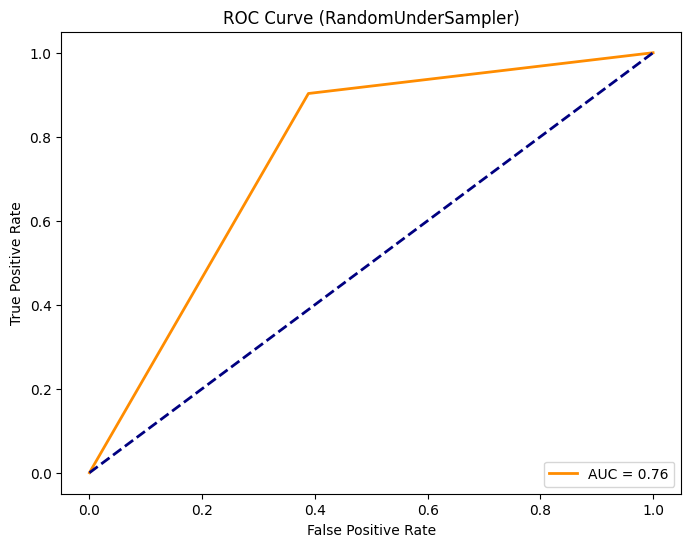

Epoch 1/30


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


330/330 [==============================] - 1s 1ms/step - loss: 1.0066 - accuracy: 0.2173
Epoch 2/30
330/330 [==============================] - 0s 1ms/step - loss: 0.4525 - accuracy: 0.9111
Epoch 3/30
330/330 [==============================] - 0s 1ms/step - loss: 0.2928 - accuracy: 0.9314
Epoch 4/30
330/330 [==============================] - 0s 1ms/step - loss: 0.2465 - accuracy: 0.9314
Epoch 5/30
330/330 [==============================] - 0s 1ms/step - loss: 0.2296 - accuracy: 0.9314
Epoch 6/30
330/330 [==============================] - 0s 1ms/step - loss: 0.2213 - accuracy: 0.9314
Epoch 7/30
330/330 [==============================] - 0s 1ms/step - loss: 0.2165 - accuracy: 0.9314
Epoch 8/30
330/330 [==============================] - 0s 1ms/step - loss: 0.2133 - accuracy: 0.9314
Epoch 9/30
330/330 [==============================] - 0s 1ms/step - loss: 0.2111 - accuracy: 0.9314
Epoch 10/30
330/330 [==============================] - 0s 1ms/step - loss: 0.2096 - accuracy: 0.9314
Epoch 11/3

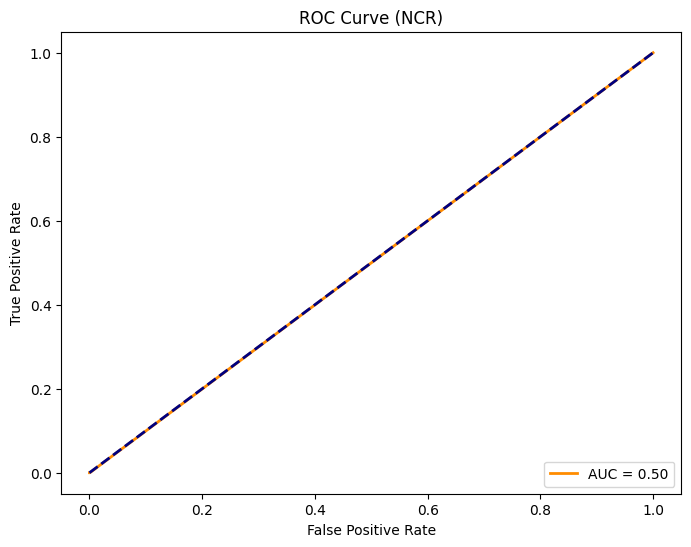

In [69]:
results = {}
scaler = StandardScaler()
#No Sampling
metrics = train_ann(X_train,y_train,X_test,y_test,'No Sampling')
results[metrics[0]] = metrics[1:]

# smote = SMOTE(random_state=42)
# X_smote, y_smote = smote.fit_resample(X_train, y_train)
X_smote, y_smote = smote(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_smote)
X_test_scaled = scaler.transform(X_test)
metrics = train_ann(X_train_scaled, y_smote, X_test_scaled, y_test,'SMOTE')
results[metrics[0]] = metrics[1:]

# ros = RandomOverSampler(random_state=42)
# X_over, y_over = ros.fit_resample(X_train, y_train)
X_over, y_over = oversample(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_over)
X_test_scaled = scaler.transform(X_test)
metrics = train_ann(X_train_scaled, y_over, X_test_scaled, y_test,'RandomOverSampler')
results[metrics[0]] = metrics[1:]


# rus = RandomUnderSampler(random_state=42)
# X_under, y_under = rus.fit_resample(X_train, y_train)
X_under, y_under = undersample(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_under)
X_test_scaled = scaler.transform(X_test)
metrics = train_ann(X_train_scaled, y_under, X_test_scaled, y_test,'RandomUnderSampler')
results[metrics[0]] = metrics[1:]

# X_ncr, y_ncr = ncr(X_train, y_train)
# metrics = train_ann(X_ncr, y_ncr, X_test, y_test,'NCR')
# results[metrics[0]] = metrics[1:]
X_ncr, y_ncr = ncr(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_ncr)
X_test_scaled = scaler.transform(X_test)
metrics = train_ann(X_train_scaled, y_ncr, X_test_scaled, y_test,'NCR')
results[metrics[0]] = metrics[1:]

In [70]:
sampling_techniques = list(results.keys())
metrics = ['Recall', 'Precision', 'F1 Score', 'Accuracy']
results_df = pd.DataFrame.from_dict(results, orient='index', columns=metrics)
sorted_df = results_df.sort_values(by=['F1 Score', 'Precision', 'Recall', 'Accuracy'], ascending=False)
sorted_df

,Recall,Precision,F1 Score,Accuracy
RandomUnderSampler,90.29,14.26,24.64,63.10
RandomOverSampler,66.99,14.53,23.88,71.47
SMOTE,15.53,30.77,20.65,92.02
No Sampling,0.00,0.00,0.00,93.32
NCR,0.00,0.00,0.00,93.26
